# [IMAGPRO] Machine Problem 1: Digital Images and DSP
$\text{submitted by: Pierre Vincent C. Hernandez}$

### Prerequisites / Environment

In order to properly run this notebook and produce it's expected output the 
Jupyter Notebook must be running using:

- **Python**: `^3.10`

Here are the list of specific packages and their version that is going to 
be used in this notebook:

- **NumPy**: `1.26.3`
- **OpenCV**: `4.9.80`
- **Matplotlib**: `3.8.3`

### Imports

Import the necessary packages to run the notebook.

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

## 1. Matrix Analysis

The images from the dataset under the `/images` will be loaded and resized into 32 by 32 matrices. 

Then, resized images is going to be aggrated into the `imgs_32x32` variable.

In [3]:
# path to dataset
dataset_path = './images'

In [4]:
imgs_32x32_interlinear = [cv.resize(
  src=cv.cvtColor(
  cv.imread(dataset_path + '/' + file), cv.COLOR_BGR2RGB), # Ensures consistent RGB format for all images
  dsize=(32, 32), # Resize to 32x32
  interpolation=cv.INTER_LINEAR) # Use default Bilinear interpolation method
  for file in os.listdir(dataset_path)] # Perform on each image

> According to the OpenCV official docuemntation, the `interpolation` method parameter of the
`cv.resize()` function that was called above has a default `InterpolationFlag` value of
`cv.INTER_LINEAR` which is the preferable interpolation--together with the `cv.INTER_CUBIC`--
when zooming or downscaling the image, and it is faster than the `cv.INTER_CUBIC` interpolation method
while it's still maintining to look OK.


We can also try to use the `cv.INTER_CUBIC` interpolation method just to see if there are any 
differences--other than the speed--between both preferred interpolation methods for zooming.

In [5]:
imgs_32x32_intercubic = [cv.resize(
  src=cv.cvtColor(
  cv.imread(dataset_path + '/' + file), cv.COLOR_BGR2RGB), # Ensures consistent RGB format for all images
  dsize=(32, 32), # Resize to 32x32
  interpolation=cv.INTER_CUBIC) # Use default Bicubic interpolation method
  for file in os.listdir(dataset_path)] # Perform on each image

### 1.0 Visualizing the images

Visualize the images using `Pyplot`.

#### Resized images using Bilinear Interpolation

The resized images that was using the Bilinear Interpolation for resizing the images is going to be visualized first.

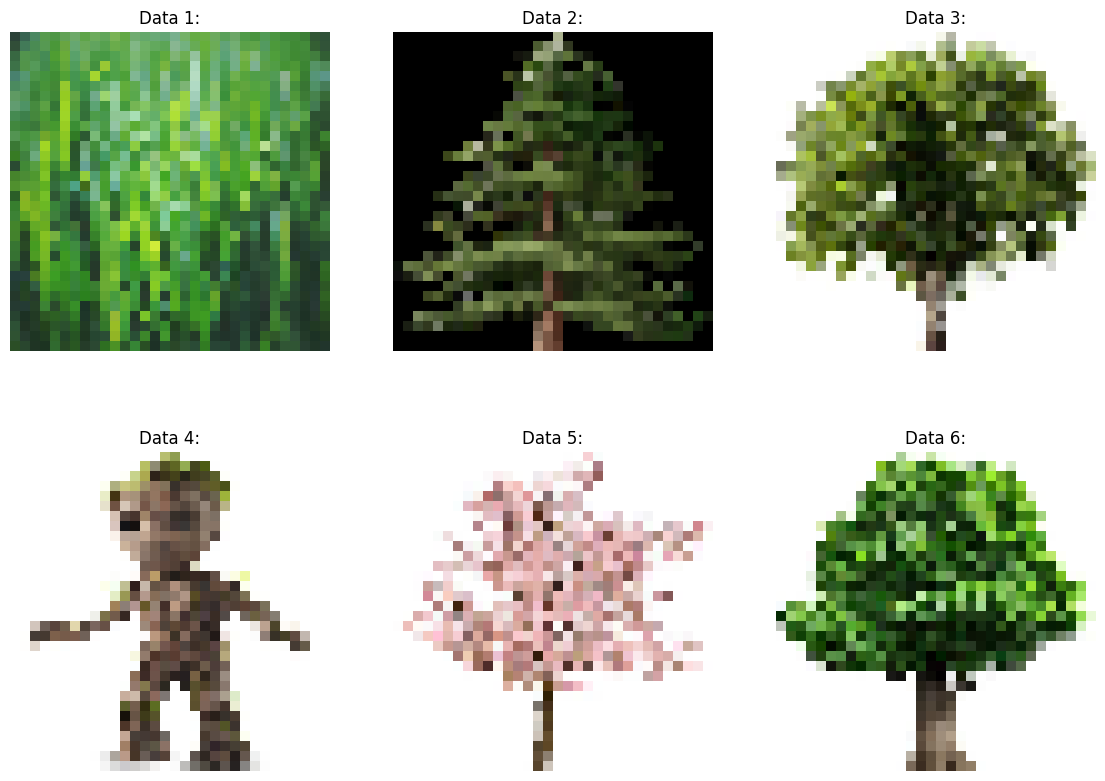

In [6]:
# -- BILINEAR INTERPOLATION --
# Setup matplotlib to have 2 rows and 3 columns for the images
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
# Flatten `axes` to easily loop through adding and visualizing the images
axes = axes.ravel()
for i in range(6):
  axes[i].imshow(imgs_32x32_interlinear[i])
  axes[i].set_title(f'Data {i + 1}:')
  axes[i].axis('off')
plt.tight_layout # auto-adjust spacing and paddings between images
plt.show()

As seen in the images plotted above, the appearance appears  more pixelated. Due to the pixels being limited to the given size,
its quality decreased since it has to compress or fit as much information into each pixel.

#### Resized images using Bicubic Interpolation

The resized images that was using the Bilinear Interpolation for resizing the images is going to be visualized next.

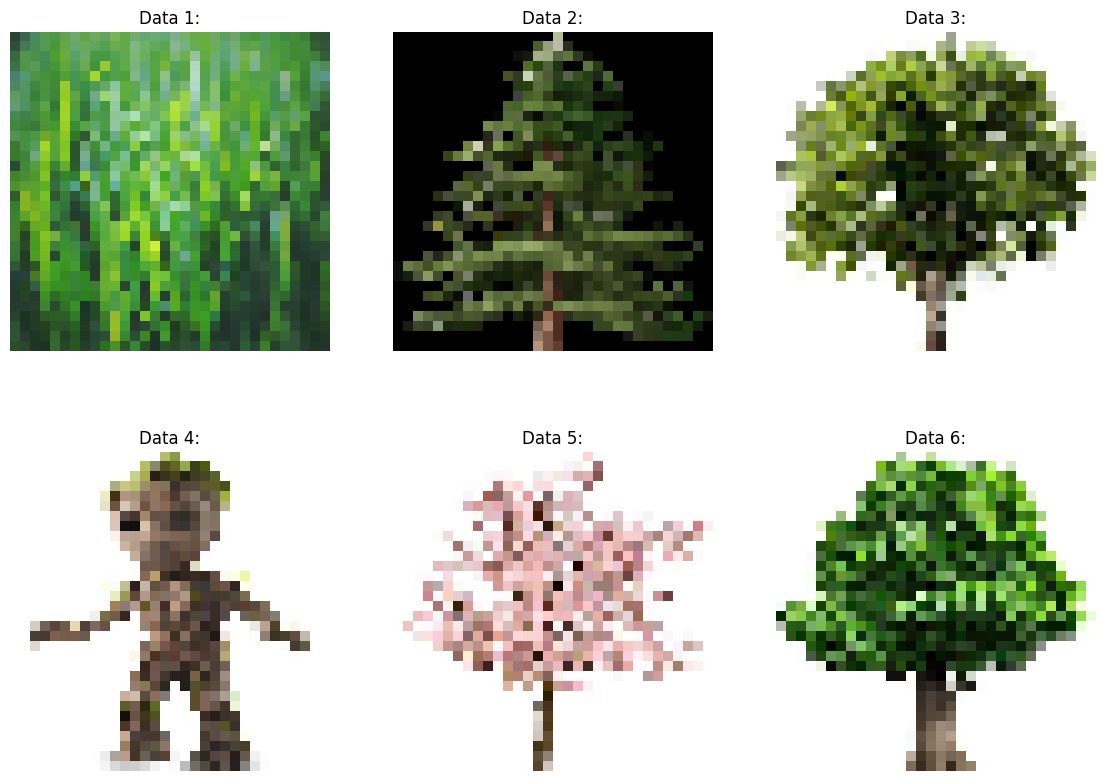

In [7]:
# -- BICUBIC INTERPOLATION --
# Setup matplotlib to have 2 rows and 3 columns for the images
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
# Flatten `axes` to easily loop through adding and visualizing the images
axes = axes.ravel()
for i in range(6):
  axes[i].imshow(imgs_32x32_intercubic[i])
  axes[i].set_title(f'Data {i + 1}:')
  axes[i].axis('off')
plt.show()

Based on the plotted images above, it seems that the quality of the images is not that far apart from each other.

#### Comparison

In order to properly discern the difference in quality of the resized image between using Bilinear Interpolation and Bicubic Interpolation, then the images of each 
interpolation methods must be plotted side-by-side.

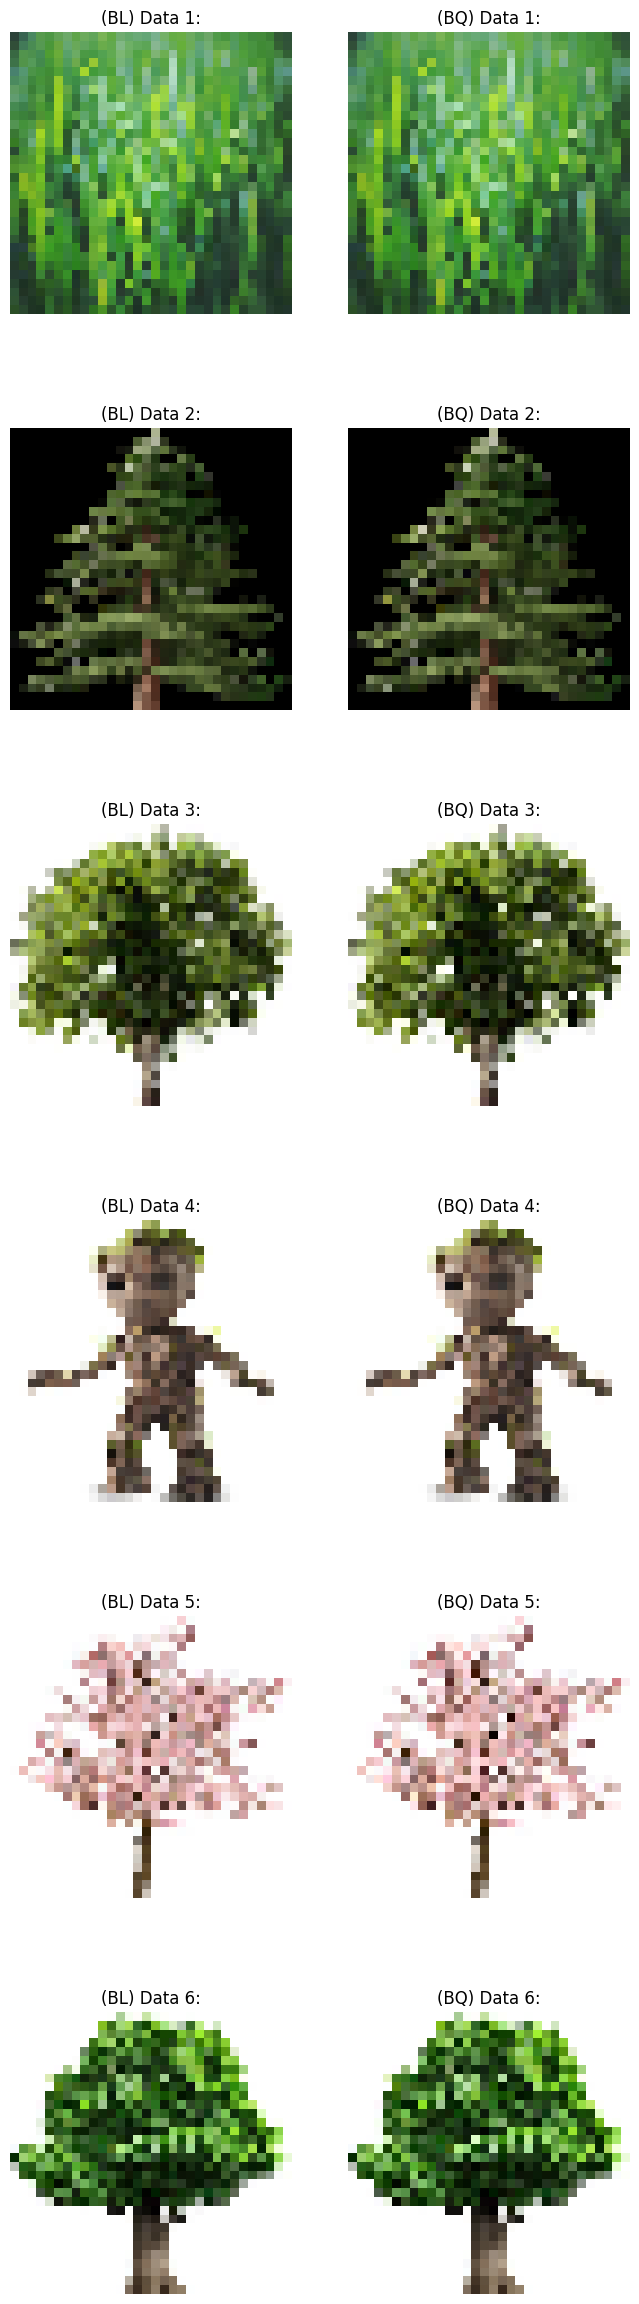

In [8]:
# -- BICUBIC INTERPOLATION --
# Setup matplotlib to have 2 rows and 3 columns for the images
fig, axes = plt.subplots(6, 2, figsize=(8, 30))
# Flatten `axes` to easily loop through adding and visualizing the images
axes = axes.ravel()
num = 0
for i in range(6):
  axes[num].imshow(imgs_32x32_interlinear[i])
  axes[num].set_title(f'(BL) Data {i + 1}:')
  axes[num].axis('off')
  axes[num + 1].imshow(imgs_32x32_intercubic[i])
  axes[num + 1].set_title(f'(BQ) Data {i + 1}:')
  axes[num + 1].axis('off')
  num = num + 2
plt.tight_layout # auto-adjust spacing and paddings between images
plt.show()

As displayed in the plot above, it's more apparent that the quality of the resized images when using Bicubic interpolation has a little bit more contrast compared to 
the resized images that uses the Bilinear interpolation.

For the sake of simplicity of the project, we'll be using the resized images that used
*Bilinear Interpolation* (default for the `resize()` function), 
`imgs_32x32_interlinear`, for resizing images to `32x32`. That variable is going to 
be reassigned to `imgs_32x32` to serve as the holder of the chosen resized images 
that uses the chosen interpolation method.

In [9]:
imgs_32x32 = imgs_32x32_interlinear # or imgs_32x32_intercubic

### 1.1 Shape of the images

We need to determine the shape of each image variable to see if they all
have been resized to a `32x32` image version of itself. This is going to be done
by turning the resized images into a **`numpy` array** and then use the `shape()`
method to see the shape of the images.

In [10]:
t_imgs_32x32 = np.array(imgs_32x32)
t_imgs_32x32.shape

(6, 32, 32, 3)

The tensor of the images has a shape of `(6, 32, 32, 3)` as displayed above. 

**Explanation:**

This means that the tensor contains exactly `6` images that has a width and 
height of `32`, and it contains `3` channels.

### 1.2 Saving the images numpy array (or tensor)


The images numpy array (tensor) is going to saved in or exported to 
an `.npy`, `imgs_32x32.npy`. This is to easily load the tensor when it is needed.

In [11]:
# Save the images numpy array or tensor to a .npy file
np.save('imgs_32x32.npy', t_imgs_32x32)

## 2. Image Statistics

Next we'll focus on the image statistics of the first image only, the `data1.jpg`.

### 2.1 Total number of pixels

#### First image

We can get the total number of **RGB pixels** by calling the `size` attribute of the first image. 
Then for the **Grayscale pixels**, we can use the `shape` attribute of the first image to retrieve
the total number of pixels per row and column, and multiply them to each other.

In [12]:
# Get the first image
imgs_32x32_first = t_imgs_32x32[0]

In [13]:
rgb_pixels_num_first_img = imgs_32x32_first.size
h, w = imgs_32x32_first.shape[:2]
gray_pixels_num_first_img = h * w
print(f'Total RGB pixels: {rgb_pixels_num_first_img}')
print(f'Total Grayscale pixels: {gray_pixels_num_first_img}')

Total RGB pixels: 3072
Total Grayscale pixels: 1024


By looking at the results above, the total number of **RGB pixels** is `3072` while the total number
of **Grayscale pixels** is `1024`.

#### All images

Next, we'll compute for the total number of pixels in the image dataset. 
We can also apply the same techniques that was already done before.

In [14]:
rgb_pixels_num_all_imgs = t_imgs_32x32.size
i_n, h_n, w_n = t_imgs_32x32.shape[:3]
gray_pixels_num_all_imgs = i_n * h_n * w_n
print(f'Total RGB pixels: {rgb_pixels_num_all_imgs}')
print(f'Total Grayscale pixels: {gray_pixels_num_all_imgs}')

Total RGB pixels: 18432
Total Grayscale pixels: 6144


It is observed that the total number of **RGB pixels** for the image dataset is `18432`
while the **Grayscale pixels** was observed to have a total of `6144` for the image dataset,
as seen above. 

### 2.2 Averaging Pixels

Averaging pixels can be done per pixel and per channel.

#### Average per pixel

Getting the average per pixel is similar to squishing an RGB image into its Grayscale version. 
This is done by averaging the 3 channels (RGB) of a pixel.

In [15]:
average_per_pixel_img = np.mean(imgs_32x32_first, axis=2) # (height, width, channel)

Next, let's load the Grayscale version using the `cv.cvtColor` function.

In [16]:
# Get the Grayscale version of the first image
imgs_32x32_first_gray = cv.cvtColor(imgs_32x32_first, cv.COLOR_RGB2GRAY)

We'll display the original image, the resulting image when averaging per pixel, and its Grayscale version.

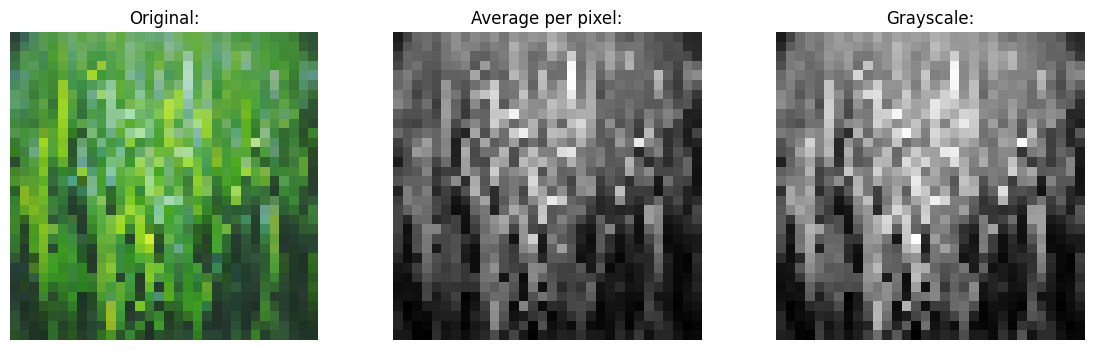

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
axes = axes.ravel()
axes[0].imshow(imgs_32x32_first)
axes[0].set_title('Original:')
axes[0].axis('off')
axes[1].imshow(average_per_pixel_img,  cmap='gray')
axes[1].set_title('Average per pixel:')
axes[1].axis('off')
axes[2].imshow(imgs_32x32_first_gray, cmap='gray')
axes[2].set_title('Grayscale:')
axes[2].axis('off')
plt.show()

As seen in the images above, getting the average per pixel operation yielded pixels that are a bit darker compared
to the Grayscale conversion of the original image using the `cv.cvtColor` function.

#### Average per channel

By getting the average per channel of the first image we can retrieve its average color expectation.

In [18]:
average_per_channel = np.mean(imgs_32x32_first, axis=(0, 1)) # (height, width, channel)
# Display results
print('Average color expectation (RGB)')
print(f'Red:\t{average_per_channel[0]}')
print(f'Green:\t{average_per_channel[1]}')
print(f'Blue:\t{average_per_channel[2]}')

Average color expectation (RGB)
Red:	76.6474609375
Green:	136.4482421875
Blue:	63.998046875


Based on the results above, it is evident that the first image Green channel's green color 
is the most dominant, which is visually correct when looking at the first image. Next to 
it is the Red channel, which produced the yellow colors in the first image when mixed with 
the Green channel. Lastly, the Blue channel, which produced the cyan or turquoise-like 
colors on the first image when mixed with the Green channel.

### 2.3 Histogram

We'll be using the histogram to see how many pixels that are equal to 0.5 and less than 0.5. 
This could show how dark and light the image is when it comes to its Grayscale version, and how dark 
each channel of the RGB image.

#### Image normalization

First, we'll normalize the image so that the pixels will have a value range of `[0, 1]`. There will be two types of
normalization that is going to be applied, the direct element-wise division of `255.0` and using `cv.normalize` function.
Normalization will be applied to `imgs_32x32_first`, `imgs_32x32_first_gray`, and `average_per_pixel_img`.

We'll be performing the normalization by element-wise division of `255.0` first to the images. This is a simple
normalization when the expected pixel value range is `[0,255]`. 

In [19]:
# -- NORMALIZATION BY ELEMENT-WISE DIVISION OF 255.0 --
norm_div255_imgs_32x32_first = imgs_32x32_first / 255.0
norm_div255_imgs_32x32_first_gray = imgs_32x32_first_gray / 255.0
norm_div255_average_per_pixel_img = average_per_pixel_img / 255.0

Next, we'll utilize the `cv.normalize` function. This is less susceptible to outliers.

In [20]:
# -- NORMALIZATION BY CV.NORMALIZE() USING CV.NORM_MINMAX METHOD --
norm_cvminmax_imgs_32x32_first = cv.normalize(src=imgs_32x32_first, dst=None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
norm_cvminmax_imgs_32x32_first_gray = cv.normalize(src=imgs_32x32_first_gray, dst=None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
norm_cvminmax_average_per_pixel_img = cv.normalize(src=average_per_pixel_img, dst=None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)

Here we'll decide on which normalization method resulting images we'll be using, specifically the normalization 
by element-wise division of `255.0` or using the `cv.NORM_MINMAX` method of the `cv.normalize()` function.

In [21]:
# Pick only one set:

# 1.) NORMALIZATION BY ELEMENT-WISE DIVISION OF 255.0
norm_imgs_32x32_first = norm_div255_imgs_32x32_first
norm_imgs_32x32_first_gray = norm_div255_imgs_32x32_first_gray
norm_average_per_pixel_img = norm_div255_average_per_pixel_img

# or

# 2.) NORMALIZATION BY CV.NORMALIZE() USING CV.NORM_MINMAX METHOD
# norm_imgs_32x32_first = norm_cvminmax_imgs_32x32_first
# norm_imgs_32x32_first_gray = norm_cvminmax_imgs_32x32_first_gray
# norm_average_per_pixel_img = norm_cvminmax_average_per_pixel_img

> I've decided to use the normalization by element-wise division of 255

#### Plotting Histogram

We'll need to split the channels of the original image, `imgs_32x32_first`, first before we can proceed in plotting.

In [22]:
r, g, b = cv.split(norm_imgs_32x32_first)

We'll now proceed on plotting the histogram.

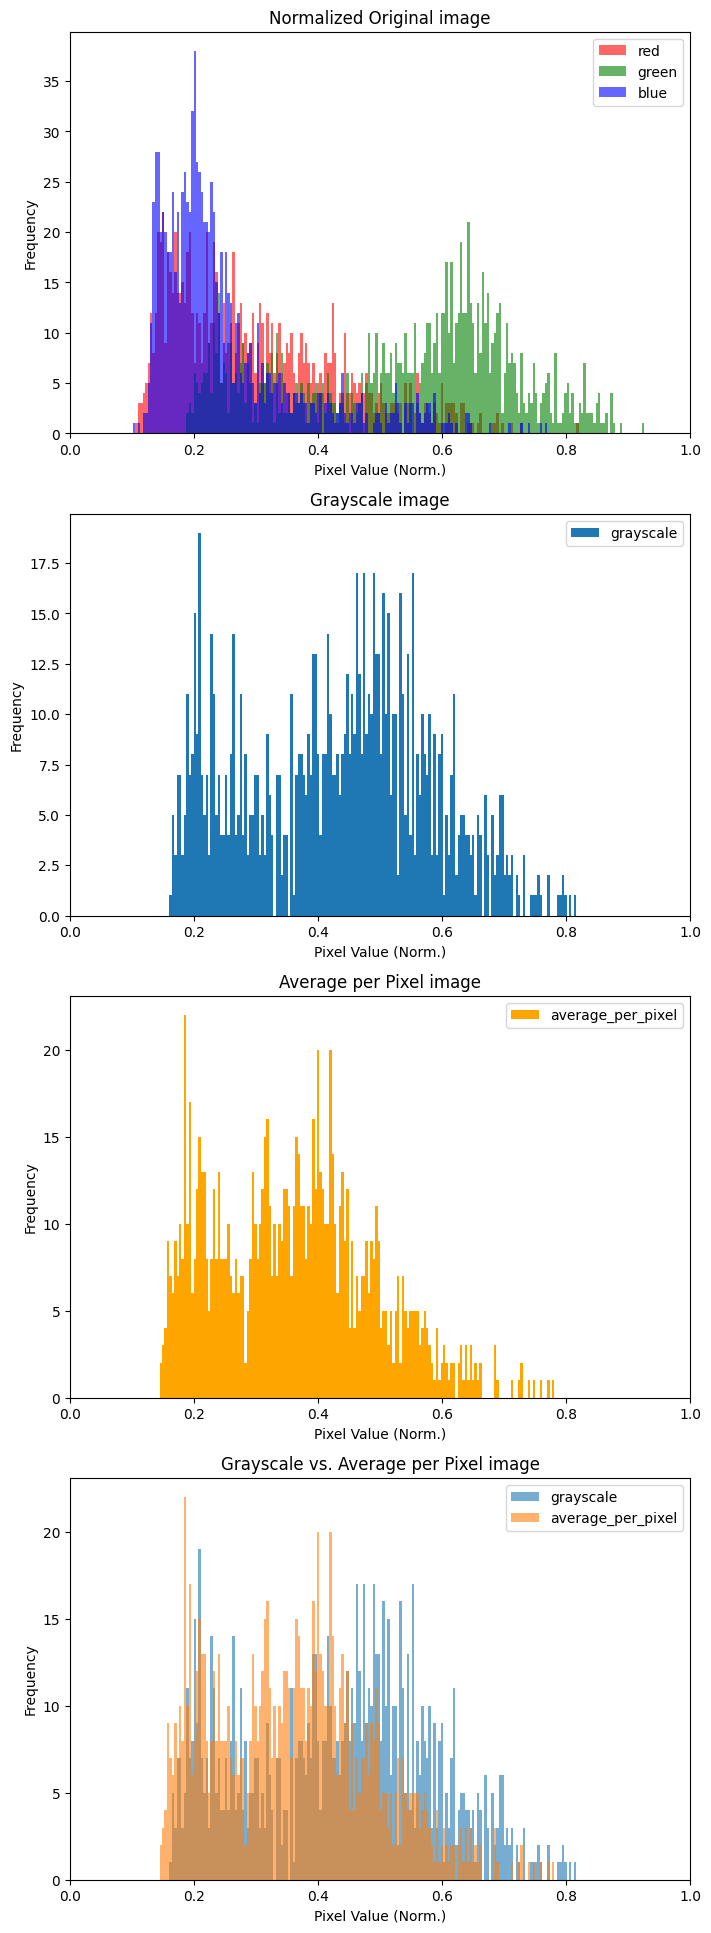

In [23]:
fig, axes = plt.subplots(4, 1, figsize=(8, 24))
axes = axes.ravel()

r_bin = axes[0].hist(r.ravel(), bins=256, range=[0,1.0], label='red', color='red', alpha=0.6)
g_bin = axes[0].hist(g.ravel(), bins=256, range=[0,1.0], label='green', color='green', alpha=0.6)
b_bin = axes[0].hist(b.ravel(), bins=256, range=[0,1.0], label='blue', color='blue', alpha=0.6)
axes[0].set_xlabel('Pixel Value (Norm.)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([0, 1.0])
axes[0].set_title('Normalized Original image')
axes[0].legend()

gray_bin = axes[1].hist(norm_imgs_32x32_first_gray.ravel(), bins=256, range=[0,1.0], label='grayscale')
axes[1].set_xlabel('Pixel Value (Norm.)')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim([0, 1.0])
axes[1].set_title('Grayscale image')
axes[1].legend()

avg_bin = axes[2].hist(norm_average_per_pixel_img.ravel(), bins=256, range=[0,1.0], label='average_per_pixel', color='orange')
axes[2].set_xlabel('Pixel Value (Norm.)')
axes[2].set_ylabel('Frequency')
axes[2].set_xlim([0, 1.0])
axes[2].set_title('Average per Pixel image')
axes[2].legend()

axes[3].hist(norm_imgs_32x32_first_gray.ravel(), bins=256, range=[0,1.0], label='grayscale', alpha=0.6)
axes[3].hist(norm_average_per_pixel_img.ravel(), bins=256, range=[0,1.0], label='average_per_pixel', alpha=0.6)
axes[3].set_xlabel('Pixel Value (Norm.)')
axes[3].set_ylabel('Frequency')
axes[3].set_xlim([0, 1.0])
axes[3].set_title('Grayscale vs. Average per Pixel image')
axes[3].legend()

plt.show()

Lastly, we'll determine how many pixels that has an intensity equal or below `0.5`.

In [25]:
threshold = 0.5 # low intensity pixels

# find the bin index that is equal or below threshold
r_bin_index = np.digitize(0.5, r_bin[1]) - 1
g_bin_index = np.digitize(0.5, g_bin[1]) - 1
b_bin_index = np.digitize(0.5, b_bin[1]) - 1
gray_bin_index = np.digitize(0.5, gray_bin[1]) - 1
avg_bin_index = np.digitize(0.5, avg_bin[1]) - 1

# original image
r_low_intensity_pixel_count = r_bin[0][:r_bin_index].sum()
g_low_intensity_pixel_count = g_bin[0][:g_bin_index].sum()
b_low_intensity_pixel_count = b_bin[0][:b_bin_index].sum()

# grayscale image
gray_low_intensity_pixel_count = gray_bin[0][:gray_bin_index].sum()

# average per pixel image
avg_low_intensity_pixel_count = avg_bin[0][:avg_bin_index].sum()

# display results
print("Number of pixels that has an intensity equal or below 0.5:")
print("\tOriginal (Red channel):  ", r_low_intensity_pixel_count)
print("\tOriginal (Green channel):", g_low_intensity_pixel_count)
print("\tOriginal (Blue channel): ", b_low_intensity_pixel_count)
print("\tGrayscale:               ", gray_low_intensity_pixel_count)
print("\tAverage per pixel:       ", avg_low_intensity_pixel_count)

Number of pixels that has an intensity equal or below 0.5:
	Original (Red channel):   920.0
	Original (Green channel): 369.0
	Original (Blue channel):  958.0
	Grayscale:                667.0
	Average per pixel:        879.0


### 2.4 Analysis / Discussion

With the resulting histogram plots and pixel counts in the previous cells, we can easily analyze the 
intensity of the images on its original RGB color system, Grayscale color system, and its average per
pixel version.

We'll start first with the number of pixels that has an intensity value equal to or below `0.5`. It is
important to reiterate that the total number of pixels per channel (for the case of RGB image) or pixel
as a whole (for the case of the Grayscale and average per pixel image) is `1024`.

Intensity observation using the number of pixels that has an intensity value equal to or below `0.5`:
- The majority of the pixels in the red channel (`Original (Red channel)`) and 
blue channel (`Original (Blue channel)`) of the original image has a low intensity (i.e. darker).
- The majority of the pixels in the red channel (`Original (Red channel)`) and 
blue channel (`Original (Blue channel)`) of the original image has a high intensity (i.e. lighter/brighter)
due to the fact that only a few of its pixels has an intensity equal to or below `0.5`.
- The pixel count for the Grayscale (`Grayscale`) and average per pixel (`Average per pixel`) image can be 
used as an evidence to the observation earlier (in section `2.2 Averaging Pixels`) that the `Average per pixel`
is darker compared to the `Grayscale` since the number of pixels that are equal to or below `0.5` is `667`
and `879`, respectively. The `Average per pixel` image has more low intensity pixels compared to `Grayscale` image.